In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from random import *
from sklearn.model_selection import train_test_split

In [2]:
columnsx = ['x1',
           'x2', 
           'x3',]
datax = pd.read_csv('xt.xls', sep='   ',names=columnsx, engine='python') 
datax.head()

,x1,x2,x3
0,0.107446,0.161348,0.200543
1,0.094024,0.107446,0.161348
2,0.088813,0.094024,0.107446
3,0.146998,0.088813,0.094024
4,0.208467,0.146998,0.088813


In [3]:
columnsy = ['y1']
datay = pd.read_csv('yt.xls', sep='   ',names=columnsy, engine='python') 
datay.head()

,y1
0,0.094024
1,0.088813
2,0.146998
3,0.208467
4,0.245734


In [4]:
print("X1 Maximo : "+ str(datax["x1"].max()) + " Minimo : "+ str(datax["x1"].min()))
print("X2 Maximo : "+ str(datax["x2"].max()) + " Minimo : "+ str(datax["x2"].min()))
print("X3 Maximo : "+ str(datax["x3"].max()) + " Minimo : "+ str(datax["x3"].min()))

X1 Maximo : 1.0 Minimo : 0.0019276076
X2 Maximo : 1.0 Minimo : 0.0019276076
X3 Maximo : 1.0 Minimo : 0.0019276076


In [5]:
X_train, X_test, y_train, y_test = train_test_split( datax, datay, test_size=0.7, random_state=42)
X_train = X_train.values.tolist()
X_test = X_test.values.tolist()
y_train = y_train.values.tolist()
y_test = y_test.values.tolist()


In [6]:
#Triangular
def triangle (x, a, m, b):
    vet = []
    for var in x:
        vet.append(max(min((var-a)/(m-a), (b-var)/(b-m)), 0))
    return vet

def plotCharts (y, step, mini, maxi, title):
    x = np.array(np.linspace(mini, maxi, step))
    #x = np.array(np.arange(mini, maxi, step))
    for i, array in enumerate(y):
        plt.plot(x,array)
    plt.title(title)
    

    

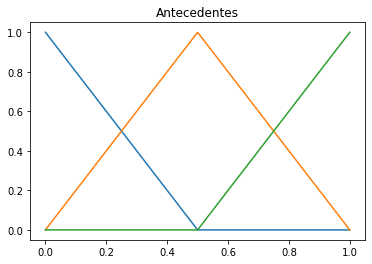

In [7]:
points = 1000
x = np.linspace(0, 1, num = points)

#array de funções
A1 = []
#Funções triangulares
A11 = triangle(x, -0.5,0,0.5)
A1.append(A11)
A12 = triangle(x, 0,0.5,1)
A1.append(A12)
A13 = triangle(x, 0.5,1,1.5)
A1.append(A13)

plotCharts(A1,points,0, 1, "Antecedentes" )

In [8]:
def vectorMi(A1, x): 
    mi = []
    mi.append(A1[0][x]) 
    mi.append(A1[1][x])
    mi.append(A1[2][x])
    return mi

def generateWeights(numInputs, numFunctions):
    weights = []
    for i in range(numInputs):
        weights.append([uniform(-0.5, 0.5) for x in range(numFunctions)])
    return weights

def calculateA(mis, weights, input):
    y=0
    for i,mi in enumerate(mis):
        #print("Y  = "+str(y)+" + " + str(mi) + " * " + str(weights[input][i]))
        y = y + mi*weights[input][i] 
        #print(y)
    return y

def calculateAlpha(mi):
    sumA=0
    for i,x in enumerate(mi):
        sumA+= x**2
    return 1/sumA


def train (X_train,columnsx, yi, segments, activation, alpha):
    for linha in range(len(X_train)):
        yi =[]
        for i, column in enumerate(columnsx): 
            # Calculando o valor de pertinencia
            #print("x : " + str(round(X_train[linha][i], 3)*1000-1))
            mi = vectorMi(A1, int(round(X_train[linha][i], 3)*1000-1))
            #print(mi)

            # B sempre dará 1 pois as funções de pertinencia são complementares.
            # Portanto não há necessidade de se calcular o b.
            b = sum(mi)
            #print("b = " + str(b))

            # Calcular o valor de A = y = mi*peso
            yi.append(calculateA(mi, weights, i)/b)

            activation.append(max(mi))
            segments.append(mi.index(max(mi)))
            alpha.append(calculateAlpha(mi))
            # y = a = soma de mi * peso
        y_predict.append(sum(yi)/3)
        #print(segments)
        #print(datay["y1"][linha])

        #Reajuste dos pesos
        delta = []
        for i in range(len(columnsx)):
            delta.append(yi[i] - y_train[linha][0])
            #print(" erro : " + str(erro[i]))
            weights[i][segments[linha*3 +i]] -= alpha[linha*3 + i] * activation[linha*3 +i]* delta[i]
        erro = (y_predict[linha] - y_train[linha])[0]
        error.append(abs(erro))
        
        #print('Erro : ' + str(error[linha]))
        #print("--------Pesos----------")
        #print("------------------")
        #print(weights)

In [9]:
#Gerando pesos aleatórios
weights = generateWeights(len(columnsx),3)
#print(weights)

yi = []
segments = []
activation = []
alpha = []

y_predict =[]
error = []
erro = 0


train(X_train, columnsx, yi, segments, activation, alpha)
print(weights)

[[-0.044075545401841804, 0.5089626880623549, 0.97337046], [-0.03368923536597646, 0.45094511159935813, 1.0898101971710763], [0.05797401472700482, 0.40957124212325013, 0.41915019581792784]]


In [10]:


# for linha in range(len(X_test)):
#     yi=[]
#     for i, column in enumerate(columnsx): 
#         # Calculando o valor de pertinencia
#         mi = vectorMi(A1, int(round(X_test[linha][i], 3)*1000-1))
#         b = sum(mi)

#         # Calcular o valor de A = y = mi*peso
#         yi.append(calculateA(mi, weights, i)/b)
#     y_predict.append(sum(yi))
#     #print(sum(yi))
#     #print(y_test[linha])
#     erro = (y_predict[linha] - y_test[linha])[0]
#     error.append(abs(erro))


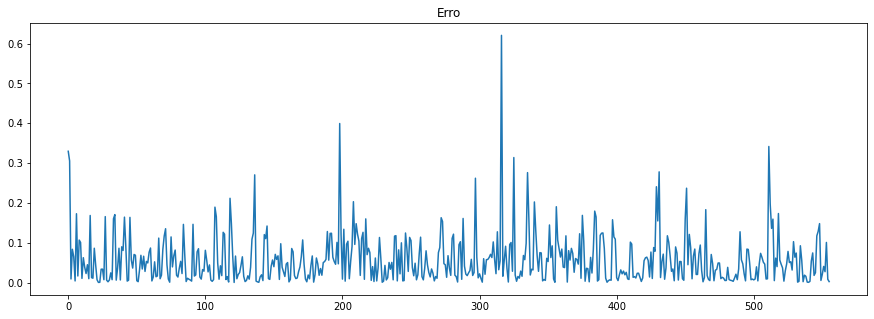

In [11]:
plt.figure(figsize=(15, 5))

plt.plot(error)
plt.title("Erro")
plt.show()


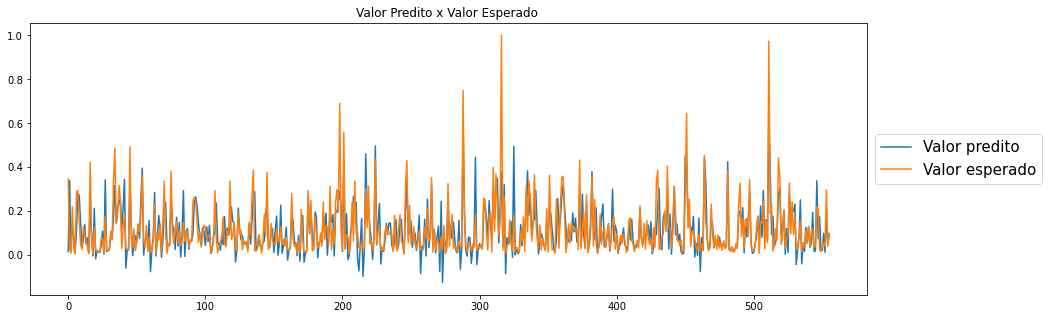

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(y_predict, label = "Valor predito")
plt.plot(y_train, label = "Valor esperado")
plt.title("Valor Predito x Valor Esperado ")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})
plt.show()

In [13]:
print(len(y_predict))
print("Y1 Maximo : "+ str(np.array(y_predict).max()) + " Minimo : "+ str(np.array(y_predict).min()))

556
Y1 Maximo : 0.6317953424120928 Minimo : -0.12369461187201714
